# Heart disease

In [16]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('heart.csv')

In [ ]:
df['target'].value_counts()

In [14]:
x = df.drop(['target'], axis=1)
y = df['target']

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state=42)

In [100]:
sc = StandardScaler()

scaler = sc.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [101]:
dec = DecisionTreeClassifier()
dec.fit(x_train_scaled,y_train)
y_pred_ = dec.predict(x_train_scaled)
y_pred = dec.predict(x_test_scaled)

In [102]:
print("Training accuracy:",accuracy_score(y_train, y_pred_))
print("Testing accuracy:",accuracy_score(y_test, y_pred))

Training accuracy: 1.0
Testing accuracy: 0.7775


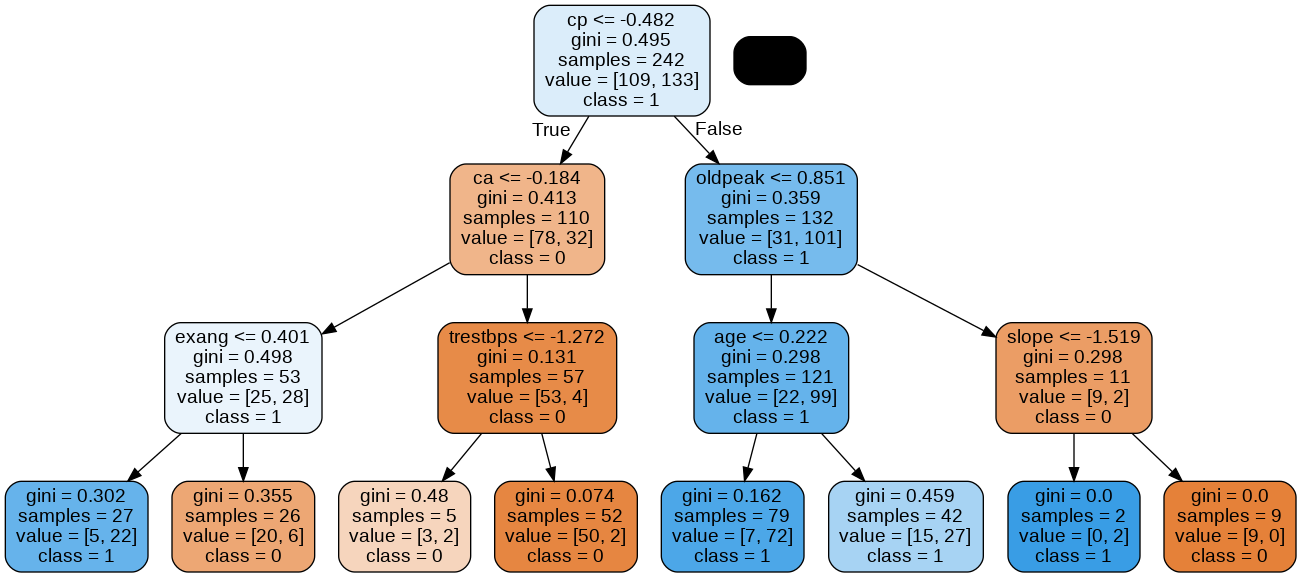

In [31]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

feature_cols = ['age', 'sex',	'cp',	'trestbps',	'chol',	'fbs',	'restecg',	'thalach',	'exang',	'oldpeak',	'slope',	'ca',	'thal']

dot_data = StringIO()

# export_graphviz function converts decision tree classifier into dot file and pydotplus convert this dot file to png
export_graphviz(dec, out_file=dot_data,  
                filled=True, rounded=True,
                feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Pre-pruning

In [ ]:
# Create Decision Tree classifer object
dec = DecisionTreeClassifier(max_depth=3)

# Train Decision Tree Classifer
history = dec.fit(x_train_scaled,y_train)

#Predict the response for train and test dataset
y_pred_ = dec.predict(x_train_scaled)
y_pred = dec.predict(x_test_scaled)

print("Training accuracy:",accuracy_score(y_train, y_pred_))
print("Testing accuracy:",accuracy_score(y_test, y_pred))

## Post-pruning

In [34]:
path = dec.cost_complexity_pruning_path(x_train_scaled, y_train)
ccp_alphas = path.ccp_alphas

In [35]:
decs = []
for ccp_alpha in ccp_alphas:
    dec = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    dec.fit(x_train_scaled, y_train)
    decs.append(dec)

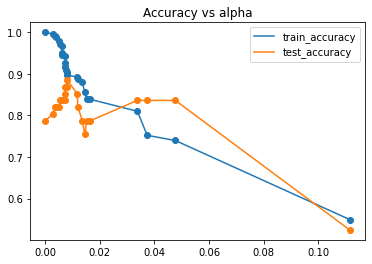

In [36]:
import matplotlib.pyplot as plt

train_acc = []
test_acc = []
for d in decs:
    y_train_pred = d.predict(x_train_scaled)
    y_test_pred = d.predict(x_test_scaled)
    train_acc.append(accuracy_score(y_train_pred,y_train))
    test_acc.append(accuracy_score(y_test_pred,y_test))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy')
plt.plot(ccp_alphas,test_acc,label='test_accuracy')
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

In [43]:
dec_ = DecisionTreeClassifier(random_state=0,ccp_alpha=0.02)
dec_.fit(x_train_scaled,y_train)

DecisionTreeClassifier(ccp_alpha=0.02, random_state=0)

In [44]:
y_pred_ = dec_.predict(x_train_scaled)
y_pred = dec_.predict(x_test_scaled)

print("Training accuracy:",accuracy_score(y_train, y_pred_))
print("Testing accuracy:",accuracy_score(y_test, y_pred))

Training accuracy: 0.8388429752066116
Testing accuracy: 0.7868852459016393


# HR data

In [75]:
df = pd.read_csv('HR_comma_sep.csv')

In [76]:
df['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

### Converting string labels into numbers.

In [77]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

df['salary']=le.fit_transform(df['salary'])
df['sales']=le.fit_transform(df['sales'])

In [78]:
x = df.drop(['left'], axis=1)
y = df['left']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state=42)

# Bank currency

In [84]:
df = pd.read_csv('bill_authentication.csv')

In [85]:
df['Class'].value_counts()

0    762
1    610
Name: Class, dtype: int64

In [ ]:
x = df.drop(['Class'], axis=1)
y = df['Class']

# Customer data

In [89]:
df = pd.read_csv('customer.csv')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [95]:
df['Exited'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [94]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [97]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

df['Geography']=le.fit_transform(df['Geography'])
df['Gender']=le.fit_transform(df['Gender'])

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df.info()

In [99]:
x = df.drop(['Exited'], axis=1)
y = df['Exited']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state=42)